##### Time feature

The timestamp that a measurement was taken.

Ideas:

The feature values need to be transformed to a numerical value that a machine learning model can understand.

- Transform the feature into one linear feature based on how much time has passed from the starting date <-- I think this one would work best
- Separate the feature into several features denoting day, month etc.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

train_df = pd.read_csv("../data/original_data/ais_train.csv", sep="|")
test_df = pd.read_csv("../data/original_data/ais_test.csv",)


In [27]:
train_df["time"].head()

0    2024-01-01 00:00:25
1    2024-01-01 00:00:36
2    2024-01-01 00:01:45
3    2024-01-01 00:03:11
4    2024-01-01 00:03:51
Name: time, dtype: object

In [28]:
test_df["time"].head()

0    2024-05-08 00:03:16
1    2024-05-08 00:06:17
2    2024-05-08 00:10:02
3    2024-05-08 00:10:34
4    2024-05-08 00:12:27
Name: time, dtype: object

In [29]:
max_time_train = train_df["time"].max()
min_time_train = train_df["time"].min()
time_count_train = train_df["time"].count()
time_unique_values_count_train = len(train_df["time"].unique())

time_converted_df_train = pd.DataFrame()
time_converted_df_train['time_converted'] = pd.to_datetime(train_df['time'], errors='coerce')
invalid_timestamps_train = time_converted_df_train['time_converted'].isna().sum()

print("Train:")

print(f"Max time: {max_time_train}")
print(f"Min time: {min_time_train}")
print(f"Count: {time_count_train}")
print(f"Unique time values: {time_unique_values_count_train}")
print(f"Count of invalid timestamps: {invalid_timestamps_train}")


max_time_test = test_df["time"].max()
min_time_test = test_df["time"].min()
time_count_test = test_df["time"].count()
time_unique_values_count_test = len(test_df["time"].unique())

time_converted_df_test = pd.DataFrame()
time_converted_df_test['time_converted'] = pd.to_datetime(test_df['time'], errors='coerce')
invalid_timestamps_test = time_converted_df_test['time_converted'].isna().sum()

print("\nTest:")

print(f"Max time: {max_time_test}")
print(f"Min time: {min_time_test}")
print(f"Count: {time_count_test}")
print(f"Unique time values: {time_unique_values_count_test}")
print(f"Count of invalid timestamps: {invalid_timestamps_test}")




Train:
Max time: 2024-05-07 23:59:08
Min time: 2024-01-01 00:00:25
Count: 1522065
Unique time values: 947226
Count of invalid timestamps: 0

Test:
Max time: 2024-05-12 23:59:58
Min time: 2024-05-08 00:03:16
Count: 51739
Unique time values: 30990
Count of invalid timestamps: 0


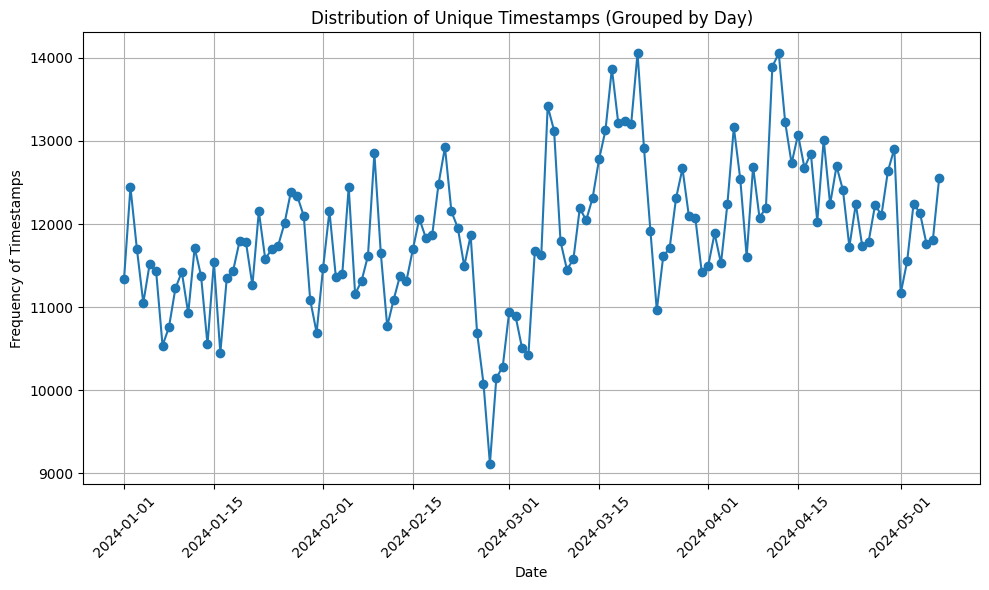

In [30]:
timestamp_distribution_train = time_converted_df_train['time_converted'].dt.floor('D').value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(timestamp_distribution_train.index, timestamp_distribution_train.values, linestyle='-', marker='o')
plt.title("Distribution of Unique Timestamps (Grouped by Day)")
plt.xlabel("Date")
plt.ylabel("Frequency of Timestamps")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

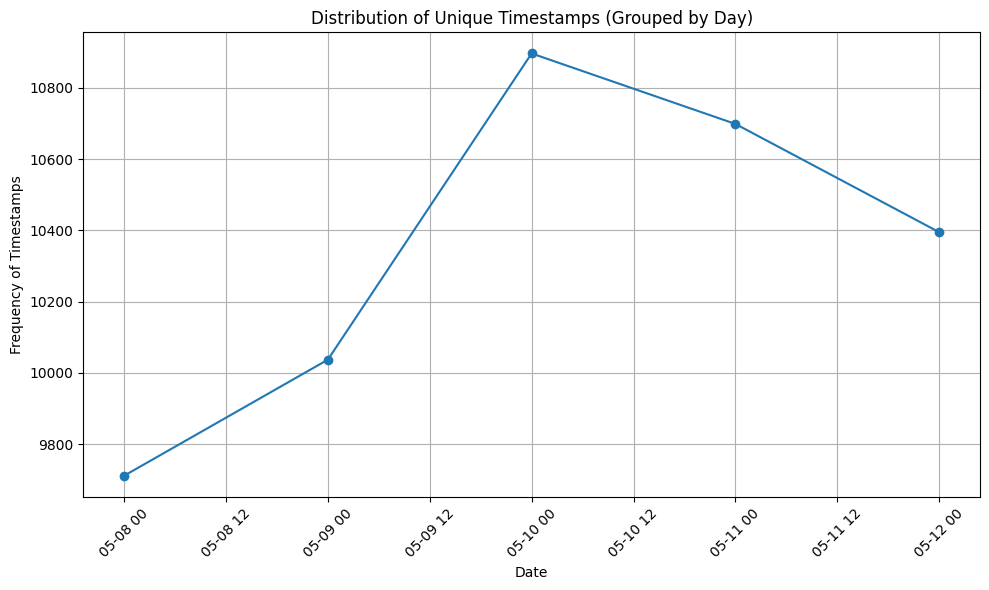

In [31]:
timestamp_distribution_test = time_converted_df_test['time_converted'].dt.floor('D').value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(timestamp_distribution_test.index, timestamp_distribution_test.values, linestyle='-', marker='o')
plt.title("Distribution of Unique Timestamps (Grouped by Day)")
plt.xlabel("Date")
plt.ylabel("Frequency of Timestamps")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()